In [1]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
from scipy.integrate import odeint
from astropy import cosmology
from IPython.display import Image
import pickle
from astropy.table import Table,Column
import numpy as np
%matplotlib inline
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 20

with open('results.pickle', 'rb') as handle:
    results = pickle.load(handle)

C =cosmology.Planck15    

In [2]:
data1 = Table.read('chi2_table_1d_mass1.fits')
data2 = Table.read('chi2_table_1d_mass2.fits')
data3 = Table.read('chi2_table_1d_mass3.fits')
data4 = Table.read('chi2_table_1d_mass4.fits')

len(data1),len(data2),len(data3),len(data4)

(390625, 390625, 390625, 390625)

In [3]:
data1.sort('chi2')
data2.sort('chi2')
data3.sort('chi2')
data4.sort('chi2')

In [4]:
def plot_rates(data1,data2,data3,data4,bins=25):
    f=plt.figure(figsize=(20,15))
    gs=gridspec.GridSpec(4,4)
    gs.update(hspace=.01)
    #top row: mass1
    ax=plt.subplot(gs[0,0])
    plt.hist(data1['BD1 to RD1'],range=(0,1),bins=bins,color='#008744',histtype='stepfilled',alpha=.5)
    plt.xlim(0,1)
    plt.title('BD->RD')
    plt.tick_params(labelleft='off',labelbottom='off')
    plt.ylabel('mass 1')
    ax=plt.subplot(gs[0,1])
    plt.hist(data1['BD1 to RE2'],range=(0,1),bins=bins,color='#008744',histtype='stepfilled',alpha=.5)
    plt.title('BD->RE')
    plt.xlim(0,1)
    plt.tick_params(labelleft='off',labelbottom='off')
    ax=plt.subplot(gs[0,2])
    plt.hist(data1['RD1 to RE2'],range=(0,1),bins=bins,color='#008744',histtype='stepfilled',alpha=.5)
    plt.title('RD->RE')
    plt.xlim(0,1)
    plt.tick_params(labelleft='off',labelbottom='off')
    ax=plt.subplot(gs[0,3])
    plt.hist(data1['K to RE1'],range=(-1,1),bins=bins,color='#008744',histtype='stepfilled',alpha=.5)
    plt.title('K RE')
    plt.xlim(-1,1)
    plt.tick_params(labelleft='off',labelbottom='off')

        #mass2
    ax=plt.subplot(gs[1,0])
    plt.hist(data2['BD2 to RD2'],range=(0,1),bins=bins,color='#0c457d',histtype='stepfilled',alpha=.5)
    plt.xlim(0,1)
    plt.tick_params(labelleft='off',labelbottom='off')
    plt.ylabel('mass 2')
    ax=plt.subplot(gs[1,1])
    plt.hist(data2['BD2 to RE3'],range=(0,1),bins=bins,color='#0c457d',histtype='stepfilled',alpha=.5)
    plt.xlim(0,1)
    plt.tick_params(labelleft='off',labelbottom='off')
    ax=plt.subplot(gs[1,2])
    plt.hist(data2['RD2 to RE3'],range=(0,1),bins=bins,color='#0c457d',histtype='stepfilled',alpha=.5)
    plt.xlim(0,1)
    plt.tick_params(labelleft='off',labelbottom='off')
    ax=plt.subplot(gs[1,3])
    plt.hist(data2['K to RE2'],range=(-1,1),bins=bins,color='#0c457d',histtype='stepfilled',alpha=.5)
    plt.xlim(-1,1)
    plt.tick_params(labelleft='off',labelbottom='off')

        #mass3
    ax=plt.subplot(gs[2,0])
    plt.hist(data3['BD3 to RD3'],range=(0,1),bins=bins,color='#aa1841',histtype='stepfilled',alpha=.5)
    plt.xlim(0,1)
    plt.tick_params(labelleft='off',labelbottom='off')
    plt.ylabel('mass 3')
    ax=plt.subplot(gs[2,1])
    plt.hist(data3['BD3 to RE4'],range=(0,1),bins=bins,color='#aa1841',histtype='stepfilled',alpha=.5)
    plt.xlim(0,1)
    plt.tick_params(labelleft='off',labelbottom='off')
    ax=plt.subplot(gs[2,2])
    plt.hist(data3['RD3 to RE4'],range=(0,1),bins=bins,color='#aa1841',histtype='stepfilled',alpha=.5)
    plt.xlim(0,1)
    plt.tick_params(labelleft='off',labelbottom='off')
    ax=plt.subplot(gs[2,3])
    plt.hist(data3['K to RE3'],range=(-1,1),bins=bins,color='#aa1841',histtype='stepfilled',alpha=.5)
    plt.xlim(-1,1)
    plt.tick_params(labelleft='off',labelbottom='off')

        #mass 4
    ax=plt.subplot(gs[3,0])
    plt.hist(data4['BD4 to RD4'],range=(0,1),bins=bins,color='#54235c',histtype='stepfilled',alpha=.5)
    plt.xlim(0,1)
    plt.tick_params(labelleft='off')
    plt.ylabel('mass 4')
    ax=plt.subplot(gs[3,1])
    plt.hist(data4['BD4 to RE5'],range=(0,1),bins=bins,color='#54235c',histtype='stepfilled',alpha=.5)
    plt.xlim(0,1)
    plt.tick_params(labelleft='off')
    ax=plt.subplot(gs[3,2])
    plt.hist(data4['RD4 to RE5'],range=(0,1),bins=bins,color='#54235c',histtype='stepfilled',alpha=.5)
    plt.xlim(0,1)
    plt.tick_params(labelleft='off')
    ax=plt.subplot(gs[3,3])
    plt.hist(data4['K to RE4'],range=(-1,1),bins=bins,color='#54235c',histtype='stepfilled',alpha=.5)
    plt.xlim(-1,1)
    plt.tick_params(labelleft='off')


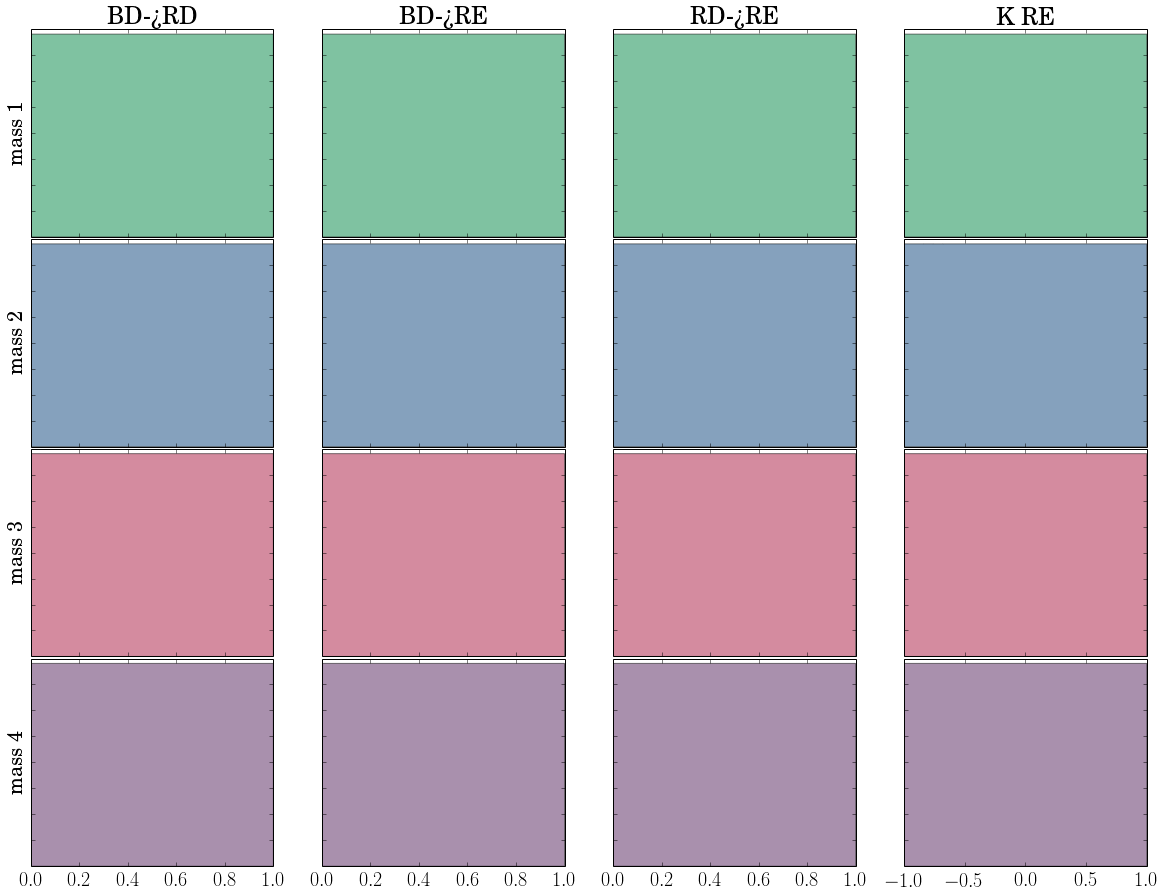

In [34]:
plot_rates(data1,data2,data3,data4)

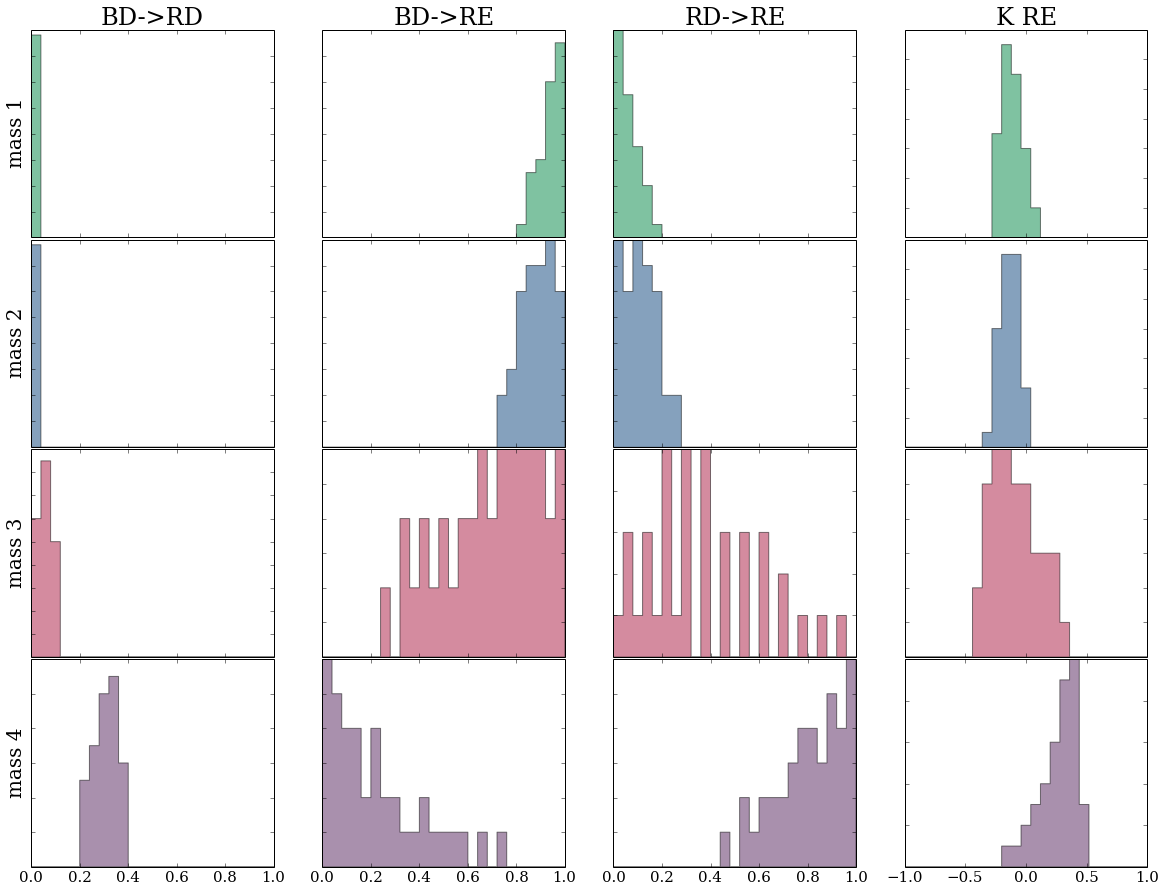

In [15]:
a = .0001 #top 1%
plot_rates(data1[0:int(a*len(data1))],data2[0:int(a*len(data2))],data3[0:int(a*len(data3))],data4[0:int(a*len(data4))],bins=25) #lowest chi2

### Corner plots!

In [72]:
def weight_fn(data):
    #weights = np.exp(-1*data['chi2'])
    weights = 1./data['chi2']
    return weights 

def corner_plot_4d():
    f=plt.figure(figsize=(17,15))
    gs=gridspec.GridSpec(9,9)
    gs.update(wspace=.02,hspace=.02)
    cmap=plt.cm.afmhot
    bins = (25,25)
    bins1d = 25
    label_fs = 20
    N_rates = 1
    rc = 'k'
    #mass1
    data = data1
    m=results['m_centers'][1]
    params=data.colnames
    params.remove(params[0]) #list of parameters

    #1d histograms
    for c in range(0,len(params)):
        ax = plt.subplot(gs[c,c])
        plt.hist(data[params[c]],weights = weight_fn(data),histtype='stepfilled',color='k',alpha=.2,lw=2,bins=bins1d)
        best_rates=[]
        for i in range(0,N_rates):
        #    best_rates.append(data[params[c]][i])
            plt.axvline(data[params[c]][i],color=rc,lw=5,alpha=.3)
        #best_rates.sort()
        #min_rate = best_rates[0]
        #max_rate = best_rates[-1]
        #plt.axvspan(min_rate,max_rate,color=rc,alpha=.03)
        if c==3:
            plt.xlabel(r'$\mathrm{\kappa_{RE}}$',fontsize=label_fs)
            plt.tick_params(labelleft='off')
        else:
            plt.tick_params(labelbottom='off',labelleft='off')


    for c in range(0,len(params)-1):
        param = params[-(len(params)-1-c)] #this row = param, plot against the rest
        
        #2d histogram
        xc = c+1
        for i in range(0,c+1): 
            ax=plt.subplot(gs[xc,i])
            hist,xedges,yedges = np.histogram2d(data[params[i]],data[param],bins=bins,weights=weight_fn(data))
            plt.imshow(hist.T,origin='lower',interpolation='nearest',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',cmap=cmap)
            if xc==3: #label x axis
                if i==0:
                    plt.xlabel(r'$\mathrm{r_{BD \rightarrow RD}}$',fontsize=label_fs)
                if i==1:
                    plt.xlabel(r'$\mathrm{r_{BD \rightarrow RE}}$',fontsize=label_fs)
                if i==2:
                    plt.xlabel(r'$\mathrm{r_{RD \rightarrow RE}}$',fontsize=label_fs)
            else:
                plt.tick_params(labelbottom='off')
            
            if i==0: #left-most plot, label y-axis
                if xc==1:
                    plt.ylabel(r'$\mathrm{r_{BD \rightarrow RE}}$',fontsize=label_fs)
                if xc==2:
                    plt.ylabel(r'$\mathrm{r_{RD \rightarrow RE}}$',fontsize=label_fs)
                if xc==3:
                    plt.ylabel(r'$\mathrm{\kappa_{RE}}$',fontsize=label_fs)
    
            else:
                plt.tick_params(labelleft='off')
    ax = plt.subplot(gs[0,2])
    ax.text(.5,.5,r'$%s < \mathrm{log} \frac{M}{M_{\odot}} < %s$'%(round((m-.15),2),round((m+.15),2)),horizontalalignment='center',fontsize=25)
    plt.tick_params(labelbottom='off',labelleft='off',color='w')
    ax.axis('off')
    

    #mass2
    data = data2
    m=results['m_centers'][2]
    params=data.colnames
    params.remove(params[0]) #list of parameters
 
    #1d histograms
    for c in range(0,len(params)):
        xc = c+5 #move to right 
        ax = plt.subplot(gs[c,xc])
        plt.hist(data[params[c]],weights = weight_fn(data),histtype='stepfilled',color='k',alpha=.2,lw=2,bins=bins1d)
        best_rates=[]
        for i in range(0,N_rates):
        #    best_rates.append(data[params[c]][i])
            plt.axvline(data[params[c]][i],color=rc,lw=5,alpha=.3)
        #best_rates.sort()
        #min_rate = best_rates[0]
        #max_rate = best_rates[-1]
        #plt.axvspan(min_rate,max_rate,color=rc,alpha=.03)

        if c==3:
            plt.xlabel(r'$\mathrm{\kappa_{RE}}$',fontsize=label_fs)
            plt.tick_params(labelleft='off')
        else:
            plt.tick_params(labelbottom='off',labelleft='off')

    for c in range(0,len(params)-1):
        param = params[-(len(params)-1-c)] #this row = param, plot against the rest

        for i in range(0,c+1): 
            xi = i+5 #move to right
            xc = c+1 #move down 1 
            ax=plt.subplot(gs[xc,xi])
            hist,xedges,yedges = np.histogram2d(data[params[i]],data[param],bins=bins,weights=weight_fn(data))
            plt.imshow(hist.T,origin='lower',interpolation='nearest',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',cmap=cmap)
            if xc==3: #label x axis
                if i==0:
                    plt.xlabel(r'$\mathrm{r_{BD \rightarrow RD}}$',fontsize=label_fs)
                if i==1:
                    plt.xlabel(r'$\mathrm{r_{BD \rightarrow RE}}$',fontsize=label_fs)
                if i==2:
                    plt.xlabel(r'$\mathrm{r_{RD \rightarrow RE}}$',fontsize=label_fs)
            else:
                plt.tick_params(labelbottom='off')
            if i==0: #left-most plot, label y-axis
                if xc==1:
                    plt.ylabel(r'$\mathrm{r_{BD \rightarrow RE}}$',fontsize=label_fs)
                if xc==2:
                    plt.ylabel(r'$\mathrm{r_{RD \rightarrow RE}}$',fontsize=label_fs)
                if xc==3:
                    plt.ylabel(r'$\mathrm{\kappa_{RE}}$',fontsize=label_fs)
            else:
                plt.tick_params(labelleft='off')
    ax = plt.subplot(gs[0,2+5])
    ax.text(.5,.5,r'$%s < \mathrm{log} \frac{M}{M_{\odot}} < %s$'%(round((m-.15),2),round((m+.15),2)),horizontalalignment='center',fontsize=25)
    plt.tick_params(labelbottom='off',labelleft='off',color='w')
    ax.axis('off')
    #mass3
    data = data3
    m=results['m_centers'][3]
    params=data.colnames
    params.remove(params[0]) #list of parameters
    
    #1d histograms
    for c in range(0,len(params)):
        ax = plt.subplot(gs[c+5,c])
        plt.hist(data[params[c]],weights = weight_fn(data),histtype='stepfilled',color='k',alpha=.2,lw=2,bins=bins1d)
        best_rates=[]
        for i in range(0,N_rates):
        #    best_rates.append(data[params[c]][i])
            plt.axvline(data[params[c]][i],color=rc,lw=5,alpha=.3)
        #best_rates.sort()
        #min_rate = best_rates[0]
        #max_rate = best_rates[-1]
        #plt.axvspan(min_rate,max_rate,color=rc,alpha=.03)

        if c==3:
            plt.xlabel(r'$\mathrm{\kappa_{RE}}$',fontsize=label_fs)
            plt.tick_params(labelleft='off')
        else:
            plt.tick_params(labelbottom='off',labelleft='off')

    for c in range(0,len(params)-1):
        param = params[-(len(params)-1-c)] #this row = param, plot against the rest

        #2d histograms
        for i in range(0,c+1): 
            xi = i
            xc = c+6 #move down
            ax=plt.subplot(gs[xc,xi])
            hist,xedges,yedges = np.histogram2d(data[params[i]],data[param],bins=bins,weights=weight_fn(data))
            plt.imshow(hist.T,origin='lower',interpolation='nearest',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',cmap=cmap)
            if  xc==8: #label x axis
                if i==0:
                    plt.xlabel(r'$\mathrm{r_{BD \rightarrow RD}}$',fontsize=label_fs)
                if i==1:
                    plt.xlabel(r'$\mathrm{r_{BD \rightarrow RE}}$',fontsize=label_fs)
                if i==2:
                    plt.xlabel(r'$\mathrm{r_{RD \rightarrow RE}}$',fontsize=label_fs)
            else:
                plt.tick_params(labelbottom='off')
            if i==0: #left-most plot, label y-axis
                if c==0:
                    plt.ylabel(r'$\mathrm{r_{BD \rightarrow RE}}$',fontsize=label_fs)
                if c==1:
                    plt.ylabel(r'$\mathrm{r_{RD \rightarrow RE}}$',fontsize=label_fs)
                if c==2:
                    plt.ylabel(r'$\mathrm{\kappa_{RE}}$',fontsize=label_fs)
            else:
                plt.tick_params(labelleft='off')
    ax = plt.subplot(gs[5,2])
    ax.text(.5,.5,r'$%s < \mathrm{log} \frac{M}{M_{\odot}} < %s$'%(round((m-.15),2),round((m+.15),2)),horizontalalignment='center',fontsize=25)
    plt.tick_params(labelbottom='off',labelleft='off',color='w')
    ax.axis('off')
    
    #mass4
    data = data4
    m=results['m_centers'][4]
    params=data.colnames
    params.remove(params[0]) #list of parameters
    
    #1d histograms
    for c in range(0,len(params)):
        ax = plt.subplot(gs[c+5,c+5])
        plt.hist(data[params[c]],weights = weight_fn(data),histtype='stepfilled',color='k',alpha=.2,lw=2,bins=bins1d)
        best_rates=[]
        for i in range(0,N_rates):
        #    best_rates.append(data[params[c]][i])
            plt.axvline(data[params[c]][i],color=rc,lw=5,alpha=.3)
        #best_rates.sort()
        #min_rate = best_rates[0]
        #max_rate = best_rates[-1]
        #plt.axvspan(min_rate,max_rate,color=rc,alpha=.03)

        if c==3:
            plt.xlabel(r'$\mathrm{\kappa_{RE}}$',fontsize=label_fs)
            plt.tick_params(labelleft='off')
        else:
            plt.tick_params(labelbottom='off',labelleft='off')

    for c in range(0,len(params)-1):
        param = params[-(len(params)-1-c)] #this row = param, plot against the rest

        for i in range(0,c+1): 
            xi = i+5 #move right
            xc = c+6 #move down 
            ax=plt.subplot(gs[xc,xi])
            hist,xedges,yedges = np.histogram2d(data[params[i]],data[param],bins=bins,weights=weight_fn(data))
            plt.imshow(hist.T,origin='lower',interpolation='nearest',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',cmap=cmap)
            if  xc==8: #label x axis
                if i==0:
                    plt.xlabel(r'$\mathrm{r_{BD \rightarrow RD}}$',fontsize=label_fs)
                if i==1:
                    plt.xlabel(r'$\mathrm{r_{BD \rightarrow RE}}$',fontsize=label_fs)
                if i==2:
                    plt.xlabel(r'$\mathrm{r_{RD \rightarrow RE}}$',fontsize=label_fs)
            else:
                plt.tick_params(labelbottom='off')
            if i==0: #left-most plot, label y-axis
                if c==0:
                    plt.ylabel(r'$\mathrm{r_{BD \rightarrow RE}}$',fontsize=label_fs)
                if c==1:
                    plt.ylabel(r'$\mathrm{r_{RD \rightarrow RE}}$',fontsize=label_fs)
                if c==2:
                    plt.ylabel(r'$\mathrm{\kappa_{RE}}$',fontsize=label_fs)

            else:
                plt.tick_params(labelleft='off')
    ax = plt.subplot(gs[5,2+5])
    ax.text(.5,.5,r'$%s < \mathrm{log} \frac{M}{M_{\odot}} < %s$'%(round((m-.15),2),round((m+.15),2)),horizontalalignment='center',fontsize=25)
    plt.tick_params(labelbottom='off',labelleft='off',color='w')
    ax.axis('off')
    
    plt.savefig('../writeup/figures/corner_plot.pdf')
    plt.savefig('../../../thesis/figures/corner_plot.pdf')

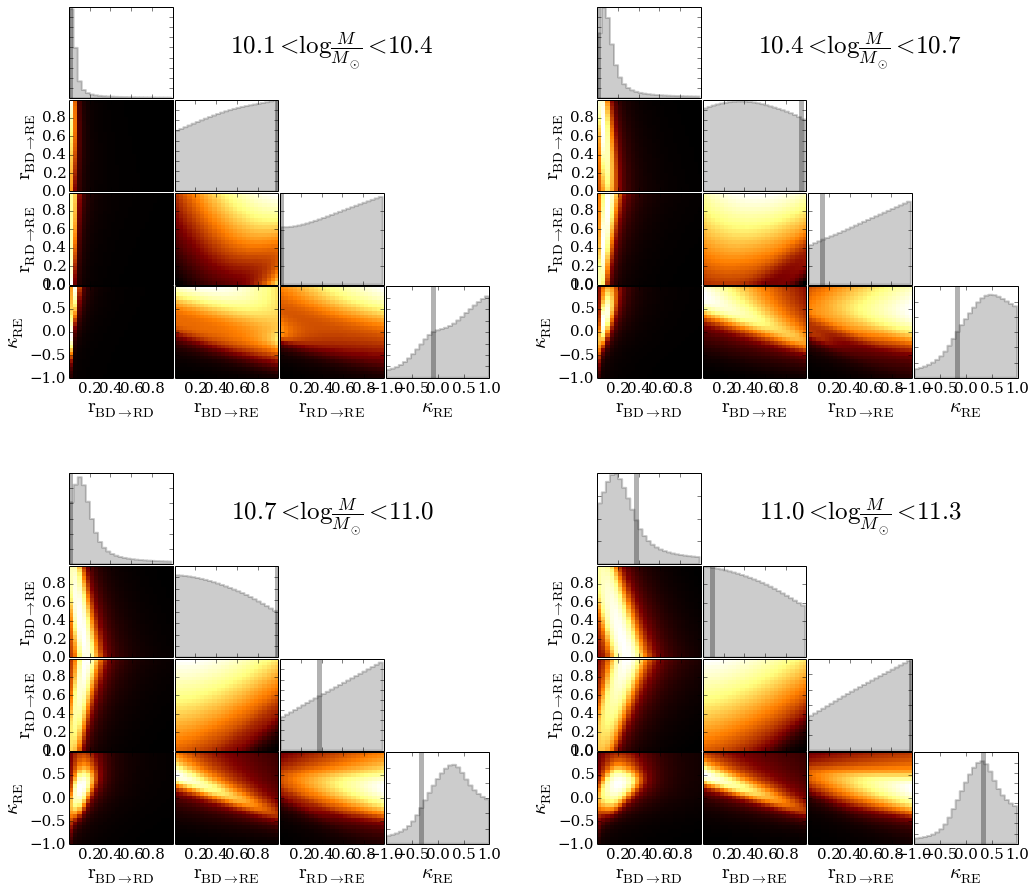

In [73]:
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15 

corner_plot_4d()

## Plot best results!

In [48]:
def alpha(a_s,M_star,m):
    alpha = (1+a_s) - m/M_star
    return alpha
def sSFR(t):
    sSFR = 2.5*(t/3.5)**(-2.2)
    return sSFR
def rate_matrix(rates,m,t):
    #create matrix using rates to reproduce differential equations when dotted with vector N0
    #m is one mass value
    rate_mtrx = pd.DataFrame(index=np.linspace(0,2,3),columns=np.linspace(0,2,3),data=np.zeros((3,3)))
    a_s = -1.4 
    M_star = 10.82

    rate_mtrx[0][0] =  - alpha(a_s,M_star,m)*sSFR(t) - rates['from BD']['to RD'] - rates['from BD']['to RE']
 
    rate_mtrx[0][1] = rates['from BD']['to RD']
    
    rate_mtrx[1][1] = - rates['from RD']['to RE']
    
    rate_mtrx[2][2] = rates['from K']['to RE']
    
    return rate_mtrx

def modelrates(N, t, rates, rate_matrix_fn, m):
    rate_mtrx = rate_matrix_fn(rates,m,t)
    return np.dot(rate_mtrx, N)
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
def find_nearest_idx(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

#labels for rate matrix
statesto = pd.Index(('BD', 'RD', 'RE'))
statesfrom = pd.Index(('BD', 'RD', 'K'))


#centers of bins where f_rid and f_dir are evaluated in the data
z_centers = results['z_centers']
#mass bins
m_centers = results['m_centers']
#define times/redshifts to compute evolution in model
zstart = 1.0
zend = 0.3
z = np.linspace(zstart, zend, 100)
t = C.age(z)
t0 = C.age(zend).value

model_z = [find_nearest(z,i) for i in z_centers[:]] #closest redshift in model to observed redshift values, excluding z=1 
#(z=1 is the input value, will always match model!)
model_z = model_z * 8 #2 for each fraction, 4 for each mass = 16 series 


rate_vector_labels = pd.Index(( ('BD to RD'),
                               ('BD to RE'),
                               ('RD to RE'),
                               ('K to RE')))

In [54]:
def model_fractions(rate_vector, m):
    # Set rates per galaxy in Gyr^{-1} at fiducial redshift
    rates = pd.DataFrame(index='to ' + statesto, columns='from ' + statesfrom,data=np.zeros(shape=(3,3)))
    for i in range(2,3):
        rates['from BD']['to RD']=rate_vector['BD to RD']
        rates['from BD']['to RE']=rate_vector['BD to RE']
        rates['from K']['to RE']=rate_vector['K to RE']
        rates['from RD']['to RE']=rate_vector['RD to RE']

    #set initial values
    states = pd.Index((('BD'),('RD'),('RE')))
    #inital BD, RD, RE for masses 1-4 (z=1)
    N0=pd.Series(index=states)
    for i in range(0,1):
        N0['BD'] = results['M={}'.format(m)]['N_BD'][len(z_centers)-1] #z=1 values
        N0['RD'] = results['M={}'.format(m)]['N_RD'][len(z_centers)-1]
        N0['RE'] = results['M={}'.format(m)]['N_RE'][len(z_centers)-1]    
    N0 /= N0.sum()  # normalise to unity
        
    #evolve numbers from z=1 to z=0.3
    N = odeint(modelrates, N0, t, args=(rates, rate_matrix, m))
    N = pd.DataFrame(index=z, columns=states, data=N)
    N=N[::-1] #number evolution of BD,RD,RE
    
    F_RD = pd.DataFrame(index=N.index) #evolution of fractions
    F_DR = pd.DataFrame(index=N.index) #evolution of fractions

    F_RD['$f_{R|D}$'] = N['RD'] / (N['RD']+N['BD'])
    F_DR['$f_{D|R}$'] = N['RD'] / (N['RD']+N['RE'])

    
    #compare results of fractions at 3 redshifts, for 2 fractions, for all 4 masses, compute chi-squared:
    chi2 = 0

    for i,zc in enumerate(z_centers[:-1]): 
        obs_f_rid = results['M={}'.format(m)]['f_RID'][i]
        obs_f_dir = results['M={}'.format(m)]['f_DIR'][i]
        obs_f_rid_err = results['M={}'.format(m)]['f_RID_err'][i]
        obs_f_dir_err = results['M={}'.format(m)]['f_DIR_err'][i]

        idx = find_nearest(z,zc) #find closest redshift to zc in model
        model_f_rid = F_RD['$f_{R|D}$'][idx]
        model_f_dir = F_DR['$f_{D|R}$'][idx]
    
        chi2 += ((obs_f_rid - model_f_rid)/obs_f_rid_err)**2
        chi2 += ((obs_f_dir - model_f_dir)/obs_f_dir_err)**2

    #all done! return chi square value for these rates
    return F_RD, F_DR, chi2
    #return chi2

In [6]:
def rate_data(m,rank=0):
    if m==1:
        data = data1
    if m==2:
        data = data2
    if m==3: 
        data = data3
    if m==4:
        data = data4
    rate_list = []
    for val in data[rank]:
        rate_list.append(val)
    rate_list = rate_list[1:]
    rate_vector = pd.Series(index=rate_vector_labels,data=rate_list) #rate combo with best chi2
    return rate_vector

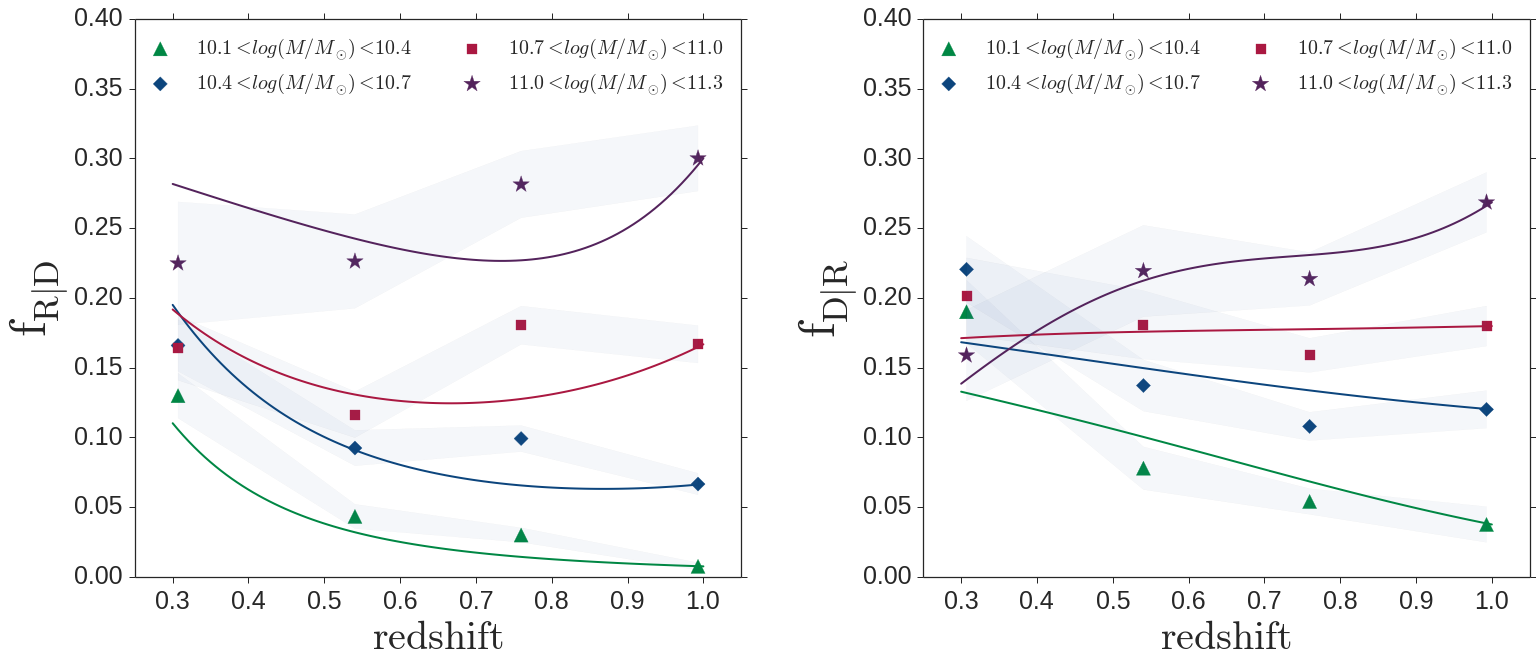

In [49]:
f=plt.figure(figsize=(25,10))
gs=gridspec.GridSpec(1,2)
gs.update(wspace=.3)
colors = ['#008744','#0c457d','#aa1841','#54235c']
markers = ['^','D','s','*']
msizes = [200,100,100,300]

m_zs = np.linspace(.3,1,100)

axrd = plt.subplot(gs[0,0])
axdr = plt.subplot(gs[0,1])

for i in range(0,4):
    m=m_centers[i+1]

    rate_vector = rate_data(i+1)


    F_RD,F_DR,chi2 = model_fractions(rate_vector,m)

    #f_RD

    y=results['M={}'.format(m)]['f_RID']
    yerr = results['M={}'.format(m)]['f_RID_err']
    lo = [a-b for a,b in zip(y,yerr)]
    hi = [a+b for a,b in zip(y,yerr)]

    axrd.scatter(model_z[0:4],y,color=colors[i],marker=markers[i],s=msizes[i],label=r'${:.1f}<log(M/M_\odot)<{:.1f}$'.format(m-.15,m+.15))
    axrd.fill_between(model_z[0:4],lo,hi,alpha=.05)

    axrd.plot(m_zs, F_RD['$f_{R|D}$'],color = colors[i],lw=2)

    axrd.set_ylim(0,.4)
    axrd.set_xlim(.25,1.05)
    axrd.set_ylabel(r'$\mathrm{f_{R|D}}$', fontsize=50)
    axrd.set_xlabel(r'$\mathrm{redshift}$',fontsize = 40)
    axrd.legend(fontsize=20,ncol=2)


    #f_DR
    y=results['M={}'.format(m)]['f_DIR']
    yerr = results['M={}'.format(m)]['f_DIR_err']
    lo = [a-b for a,b in zip(y,yerr)]
    hi = [a+b for a,b in zip(y,yerr)]

    axdr.scatter(model_z[0:4],y,color=colors[i],marker=markers[i],s=msizes[i],label=r'${:.1f}<log(M/M_\odot)<{:.1f}$'.format(m-.15,m+.15))
    axdr.fill_between(model_z[0:4],lo,hi,alpha=.05)

    axdr.plot(m_zs, F_DR['$f_{D|R}$'],color = colors[i],lw=2)
    axdr.set_ylabel(r'$\mathrm{f_{D|R}}$', fontsize=50)
    axdr.set_xlabel(r'$\mathrm{redshift}$',fontsize = 40)
    axdr.set_xlim(.25,1.05)
    axdr.set_ylim(0,.4)
    plt.legend(fontsize=20,ncol=2)


plt.savefig('../writeup/figures/fractions_modeled.pdf')
plt.savefig('../../../thesis/figures/fractions_modeled.pdf')

In [48]:
import seaborn as sns
sns.set_style('ticks')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25 


In [32]:
m_centers-.15

TypeError: unsupported operand type(s) for -: 'list' and 'float'

In [55]:
    rates = pd.DataFrame(index='to ' + statesto, columns='from ' + statesfrom,data=np.zeros(shape=(3,3)))
    for i in range(2,3):
        rates['from BD']['to RD']=rate_vector['BD to RD']
        rates['from BD']['to RE']=rate_vector['BD to RE']
        rates['from K']['to RE']=rate_vector['K to RE']
        rates['from RD']['to RE']=rate_vector['RD to RE']

    #set initial values
    states = pd.Index((('BD'),('RD'),('RE')))
    #inital BD, RD, RE for masses 1-4 (z=1)
    N0=pd.Series(index=states)
    for i in range(0,1):
        N0['BD'] = results['M={}'.format(m)]['N_BD'][len(z_centers)-1] #z=1 values
        N0['RD'] = results['M={}'.format(m)]['N_RD'][len(z_centers)-1]
        N0['RE'] = results['M={}'.format(m)]['N_RE'][len(z_centers)-1]    
    N0 /= N0.sum()  # normalise to unity


In [57]:
    N = odeint(modelrates, N0, t, args=(rates, rate_matrix, m))

In [4]:
data1[0]

chi2,BD1 to RD1,BD1 to RE2,RD1 to RE2,K to RE1
float64,float64,float64,float64,float64
24.3438172832,0.005,0.989,0.005,-0.082


In [5]:
data2[0]

chi2,BD2 to RD2,BD2 to RE3,RD2 to RE3,K to RE2
float64,float64,float64,float64,float64
26.3792059111,0.005,0.948,0.128,-0.165


In [6]:
data3[0]

chi2,BD3 to RD3,BD3 to RE4,RD3 to RE4,K to RE3
float64,float64,float64,float64,float64
20.2252000755,0.005,0.989,0.374,-0.33


In [7]:
data4[0]

chi2,BD4 to RD4,BD4 to RE5,RD4 to RE5,K to RE4
float64,float64,float64,float64,float64
8.15453055991,0.374,0.087,0.989,0.33


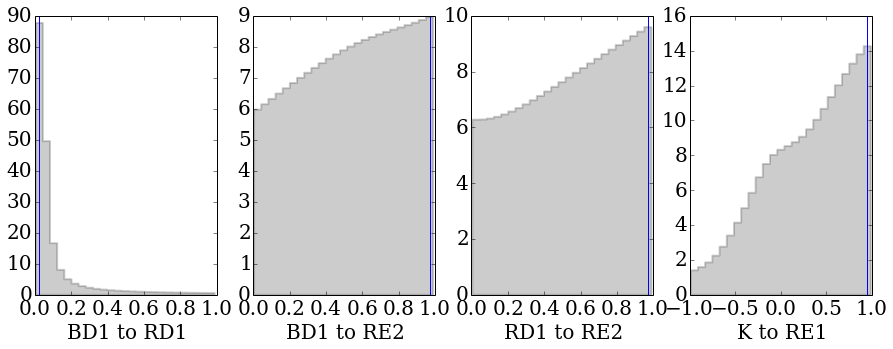

In [49]:
f=plt.figure(figsize=(15,5))
data = data1
m=results['m_centers'][1]
params=data.colnames
params.remove(params[0]) #list of parameters
gs = gridspec.GridSpec(1,4)
#1d histograms
rate_list = []
for c in range(0,len(params)):
    ax = plt.subplot(gs[0,c])
    hist = plt.hist(data[params[c]],weights = weight_fn(data),histtype='stepfilled',color='k',alpha=.2,lw=2,bins=25)
    edges=hist[1]
    histvals = hist[0]
    left_idx = find_nearest_idx(histvals,np.max(histvals)) #left edge of hist peak
    maxval=(edges[left_idx]+edges[left_idx+1])/2
    rate_list.append(maxval)
    plt.axvline(maxval)
    plt.xlabel('{:}'.format(params[c]))



In [51]:
    rate_vector = pd.Series(index=rate_vector_labels,data=rate_list) #rate combo with best chi2


In [52]:
rate_vector

BD to RD    0.02468
BD to RE    0.96932
RD to RE    0.96932
K to RE     0.95040
dtype: float64

In [55]:
    F_RD,F_DR,chi2 = model_fractions(rate_vector,m_centers[1])


In [57]:
m = m_centers[1]
colors = ['#008744','#0c457d','#aa1841','#54235c']
markers = ['^','D','s','*']
msizes = [200,100,100,300]
i=0

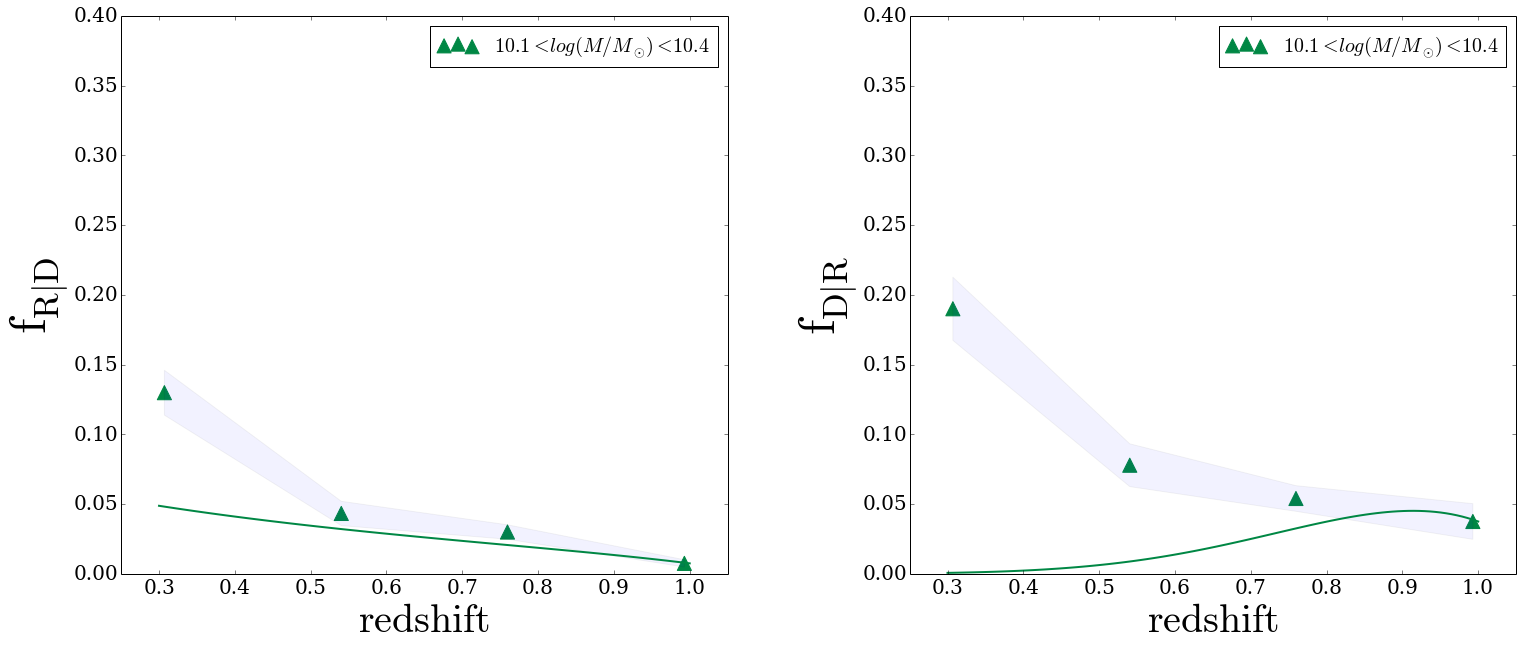

In [59]:
f=plt.figure(figsize=(25,10))
gs=gridspec.GridSpec(1,2)
gs.update(wspace=.3)
colors = ['#008744','#0c457d','#aa1841','#54235c']
markers = ['^','D','s','*']
msizes = [200,100,100,300]

m_zs = np.linspace(.3,1,100)

axrd = plt.subplot(gs[0,0])
axdr = plt.subplot(gs[0,1])

y=results['M={}'.format(m)]['f_RID']
yerr = results['M={}'.format(m)]['f_RID_err']
lo = [a-b for a,b in zip(y,yerr)]
hi = [a+b for a,b in zip(y,yerr)]

axrd.scatter(model_z[0:4],y,color=colors[i],marker=markers[i],s=msizes[i],label=r'${:.1f}<log(M/M_\odot)<{:.1f}$'.format(m-.15,m+.15))
axrd.fill_between(model_z[0:4],lo,hi,alpha=.05)

axrd.plot(m_zs, F_RD['$f_{R|D}$'],color = colors[i],lw=2)

axrd.set_ylim(0,.4)
axrd.set_xlim(.25,1.05)
axrd.set_ylabel(r'$\mathrm{f_{R|D}}$', fontsize=50)
axrd.set_xlabel(r'$\mathrm{redshift}$',fontsize = 40)
axrd.legend(fontsize=20,ncol=2)
y=results['M={}'.format(m)]['f_DIR']
yerr = results['M={}'.format(m)]['f_DIR_err']
lo = [a-b for a,b in zip(y,yerr)]
hi = [a+b for a,b in zip(y,yerr)]

axdr.scatter(model_z[0:4],y,color=colors[i],marker=markers[i],s=msizes[i],label=r'${:.1f}<log(M/M_\odot)<{:.1f}$'.format(m-.15,m+.15))
axdr.fill_between(model_z[0:4],lo,hi,alpha=.05)

axdr.plot(m_zs, F_DR['$f_{D|R}$'],color = colors[i],lw=2)
axdr.set_ylabel(r'$\mathrm{f_{D|R}}$', fontsize=50)
axdr.set_xlabel(r'$\mathrm{redshift}$',fontsize = 40)
axdr.set_xlim(.25,1.05)
axdr.set_ylim(0,.4)
plt.legend(fontsize=20,ncol=2)


In [37]:
params = data1.colnames

In [38]:
params

['chi2', 'BD1 to RD1', 'BD1 to RE2', 'RD1 to RE2', 'K to RE1']

In [54]:
params=params[1:]

In [55]:
params

['BD1 to RD1', 'BD1 to RE2', 'RD1 to RE2', 'K to RE1']

In [49]:
    for c in range(0,len(params)):
        best_rates=[]
        for i in range(0,N_rates):
            best_rates.append(data[params[c]][i])


[0.98899999999999999,
 0.98899999999999999,
 0.98899999999999999,
 0.94799999999999995,
 0.98899999999999999,
 0.94799999999999995,
 0.98899999999999999,
 0.98899999999999999,
 0.90700000000000003,
 0.94799999999999995]

In [50]:
best_rates.sort()

In [51]:
best_rates

[0.90700000000000003,
 0.94799999999999995,
 0.94799999999999995,
 0.94799999999999995,
 0.98899999999999999,
 0.98899999999999999,
 0.98899999999999999,
 0.98899999999999999,
 0.98899999999999999,
 0.98899999999999999]

In [53]:
best_rates[0]

0.90700000000000003